Plotting and filtering options for through-space (IJ) data
==========================================================

Every RNAvigate plot that displays IJ data has built-in options to filter and
display that data in a number of ways. Here we will explore the options available
and how they can be used. I will use arc plots to illustrate, but again, any
plot with IJ data can accept these options.

At the bottom of this page, you will find a reference to all of the available
options.

In [1]:
%matplotlib inline
import rnavigate as MaP

In [2]:
path = 'data/'


def return_sample(sample):
    return MaP.Sample(sample=sample,
                      profile =      path+sample+"_rnasep_profile.txt",
                      ct =           path+"RNaseP.ct",
                      rings =        path+sample+"-rnasep.corrs",
                      pairs =        path+sample+"-rnasep-pairmap.txt",
                      probs =        path+"rnasep.dp",
                      dance_prefix = path+sample+"_rnasep",
                      deletions =    path+"example-rnasep-deletions.txt",
                      fasta =        path+"RNaseP-noSC.fasta",
                      pdb =          path+"3dhsCrystal_PlusLoops.pdb",
                      pdb_kwargs =   {"chain":"A"})


example1 = return_sample("example1")

Demonstration
-------------

In this example, we'll be looking at SHAPE-JuMP data, which is particularly
dense and requires filtering.

First, lets see what these data look like in there raw form. The metric used to
color these data defaults to "Percentile" which is on a scale from 0 to 1. So
lets use min_max=[0,1] and see what happens.

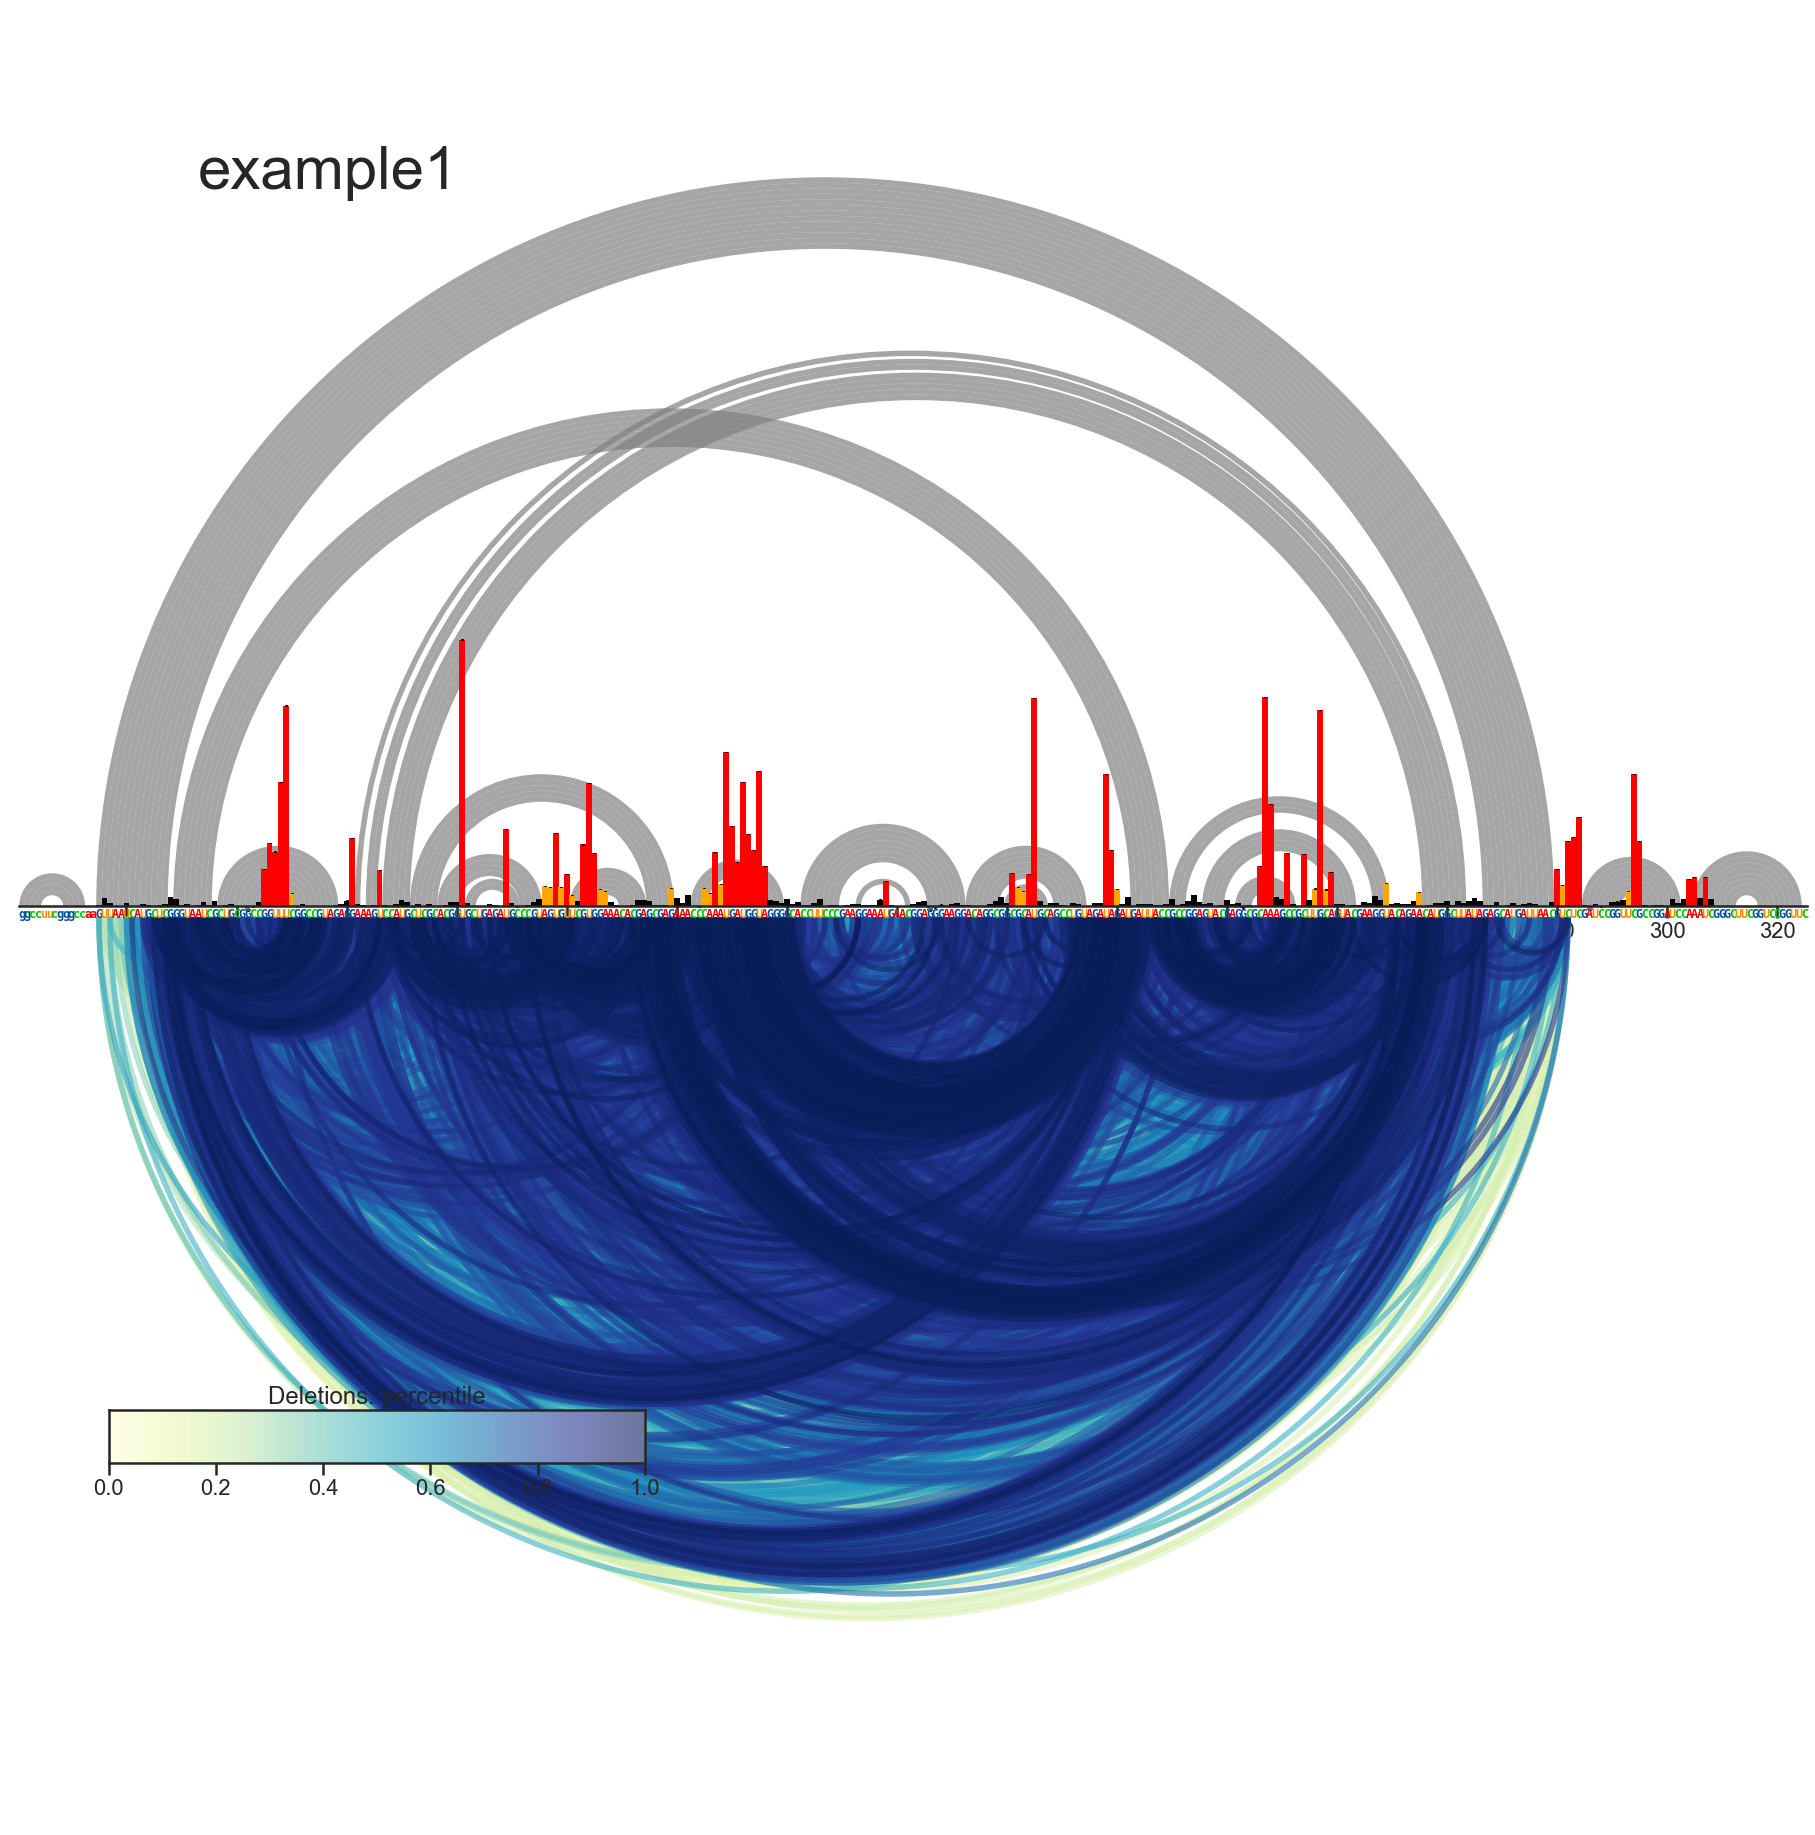

In [3]:
example1.make_ap(ij="deletions", min_max=[0,1])

Too much data! We can't make anything of this.

Let's apply a filter the percentile (95th) to make it more manageable. We'll
change the min_max accordingly.

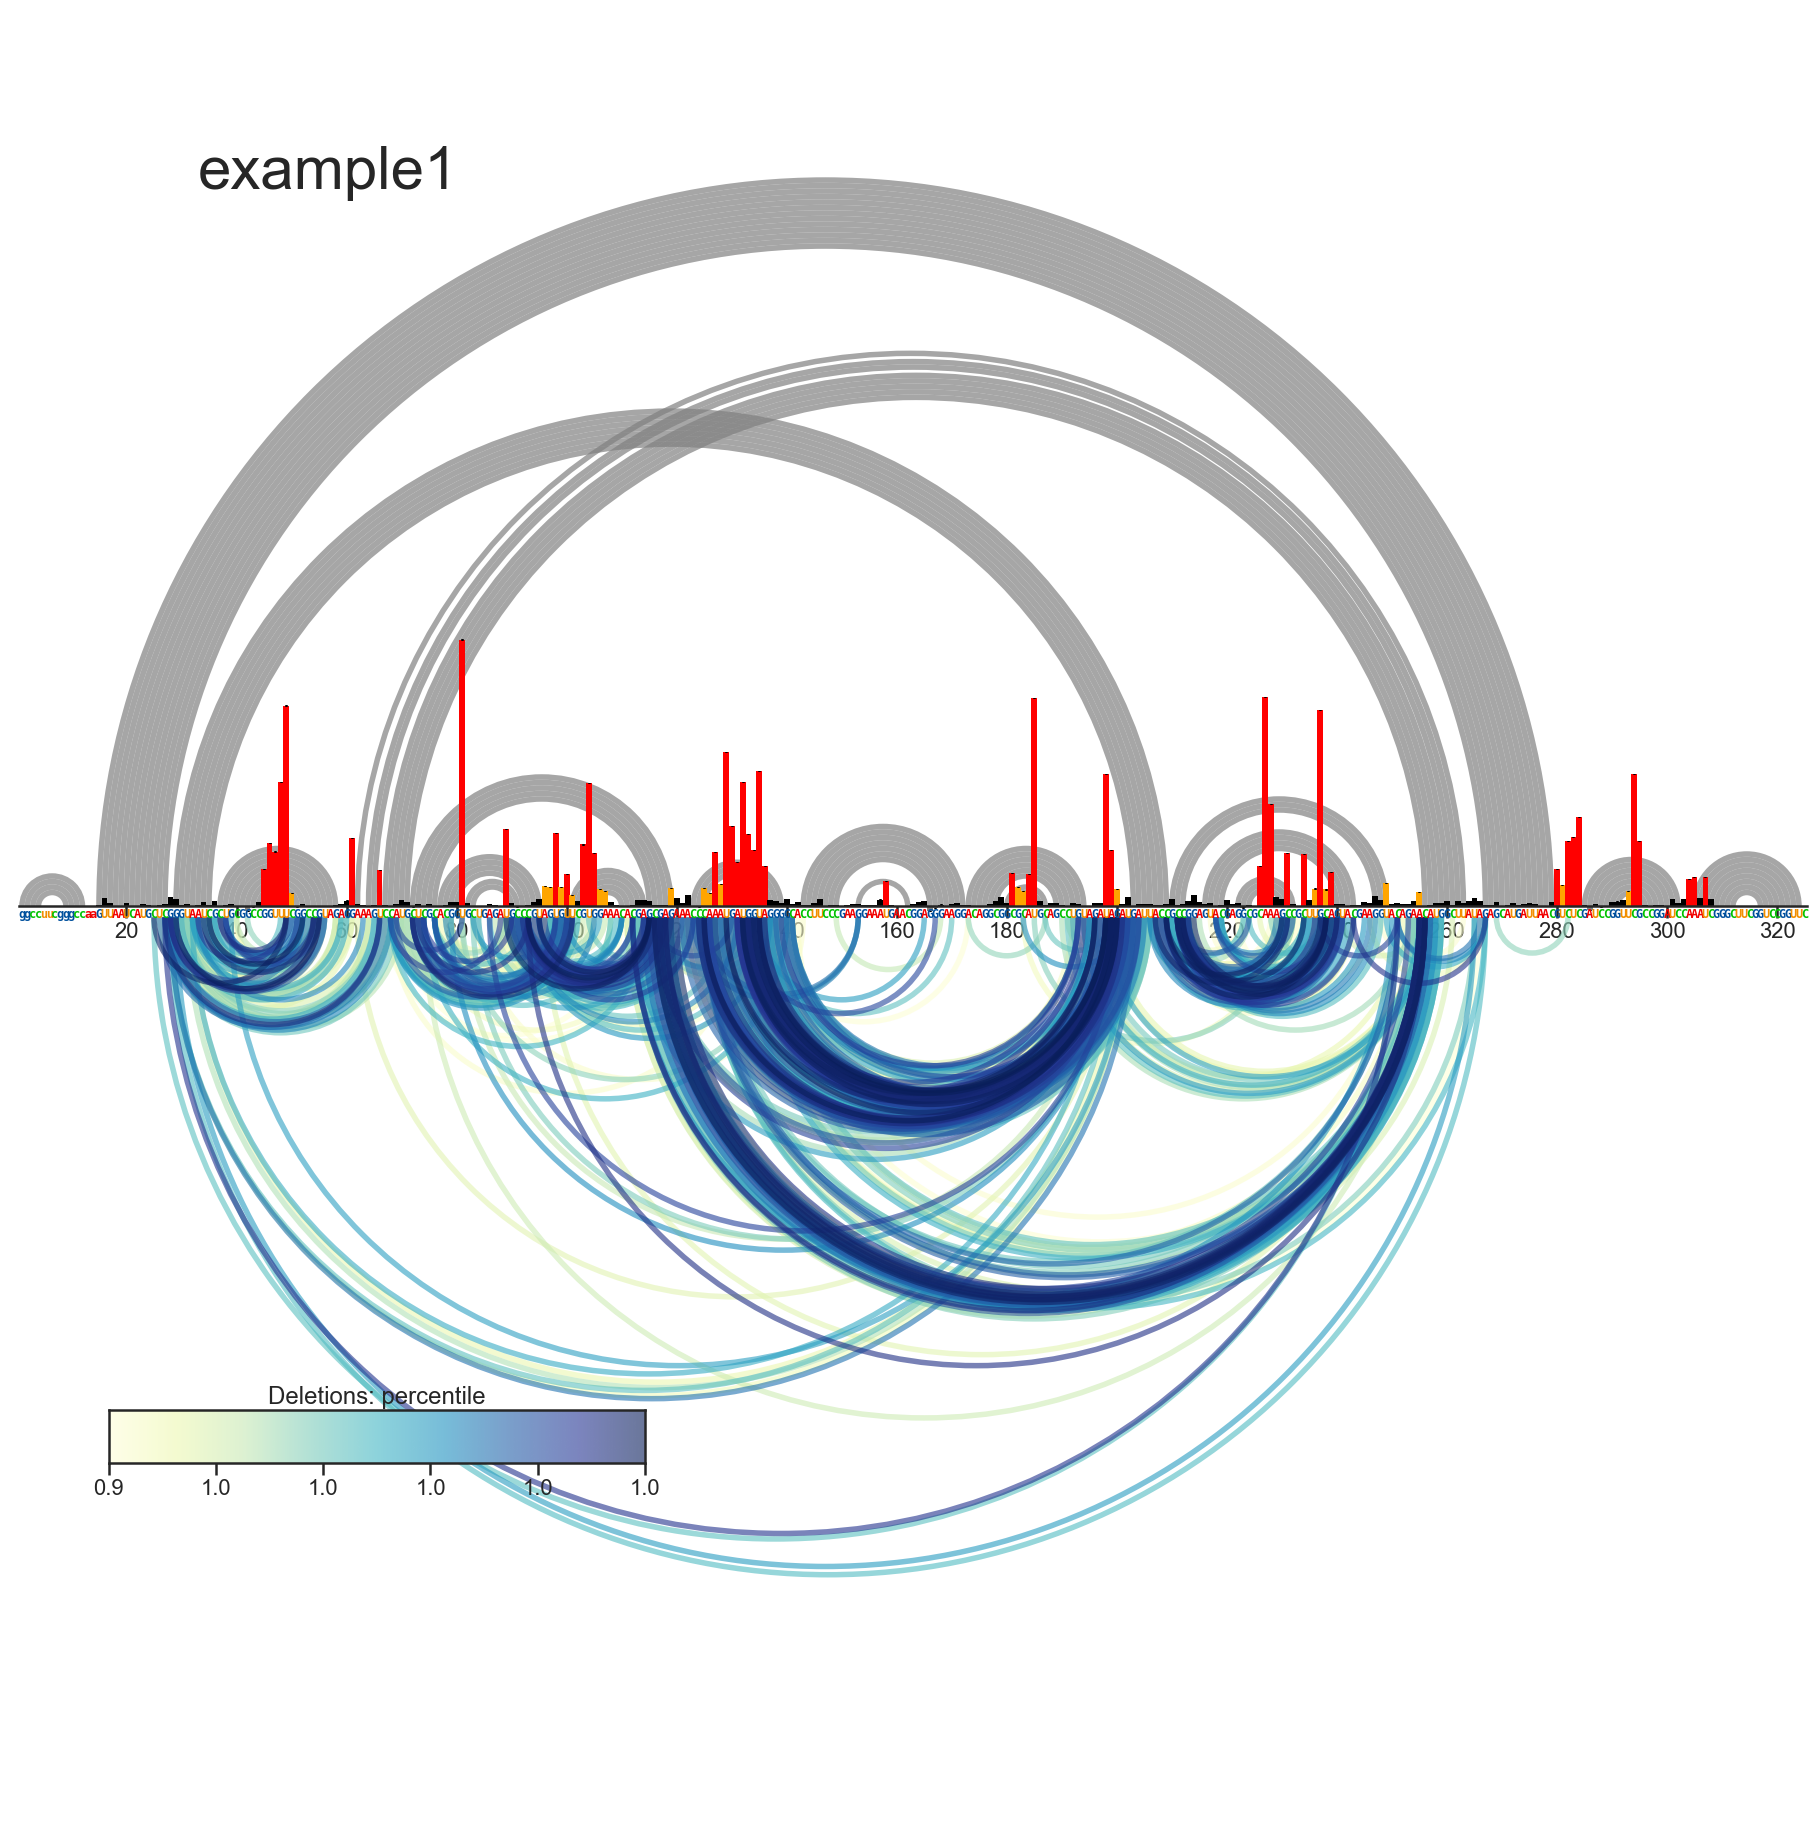

In [4]:
example1.make_ap(ij="deletions", Percentile_ge=0.95, min_max=[0.95,1])

Better. Still, many of these are reflective of secondary structure, and really,
we're interested in tertiary structure. Let's apply a minimum contact distance
(a measure of distance in secondary structure) of 15.

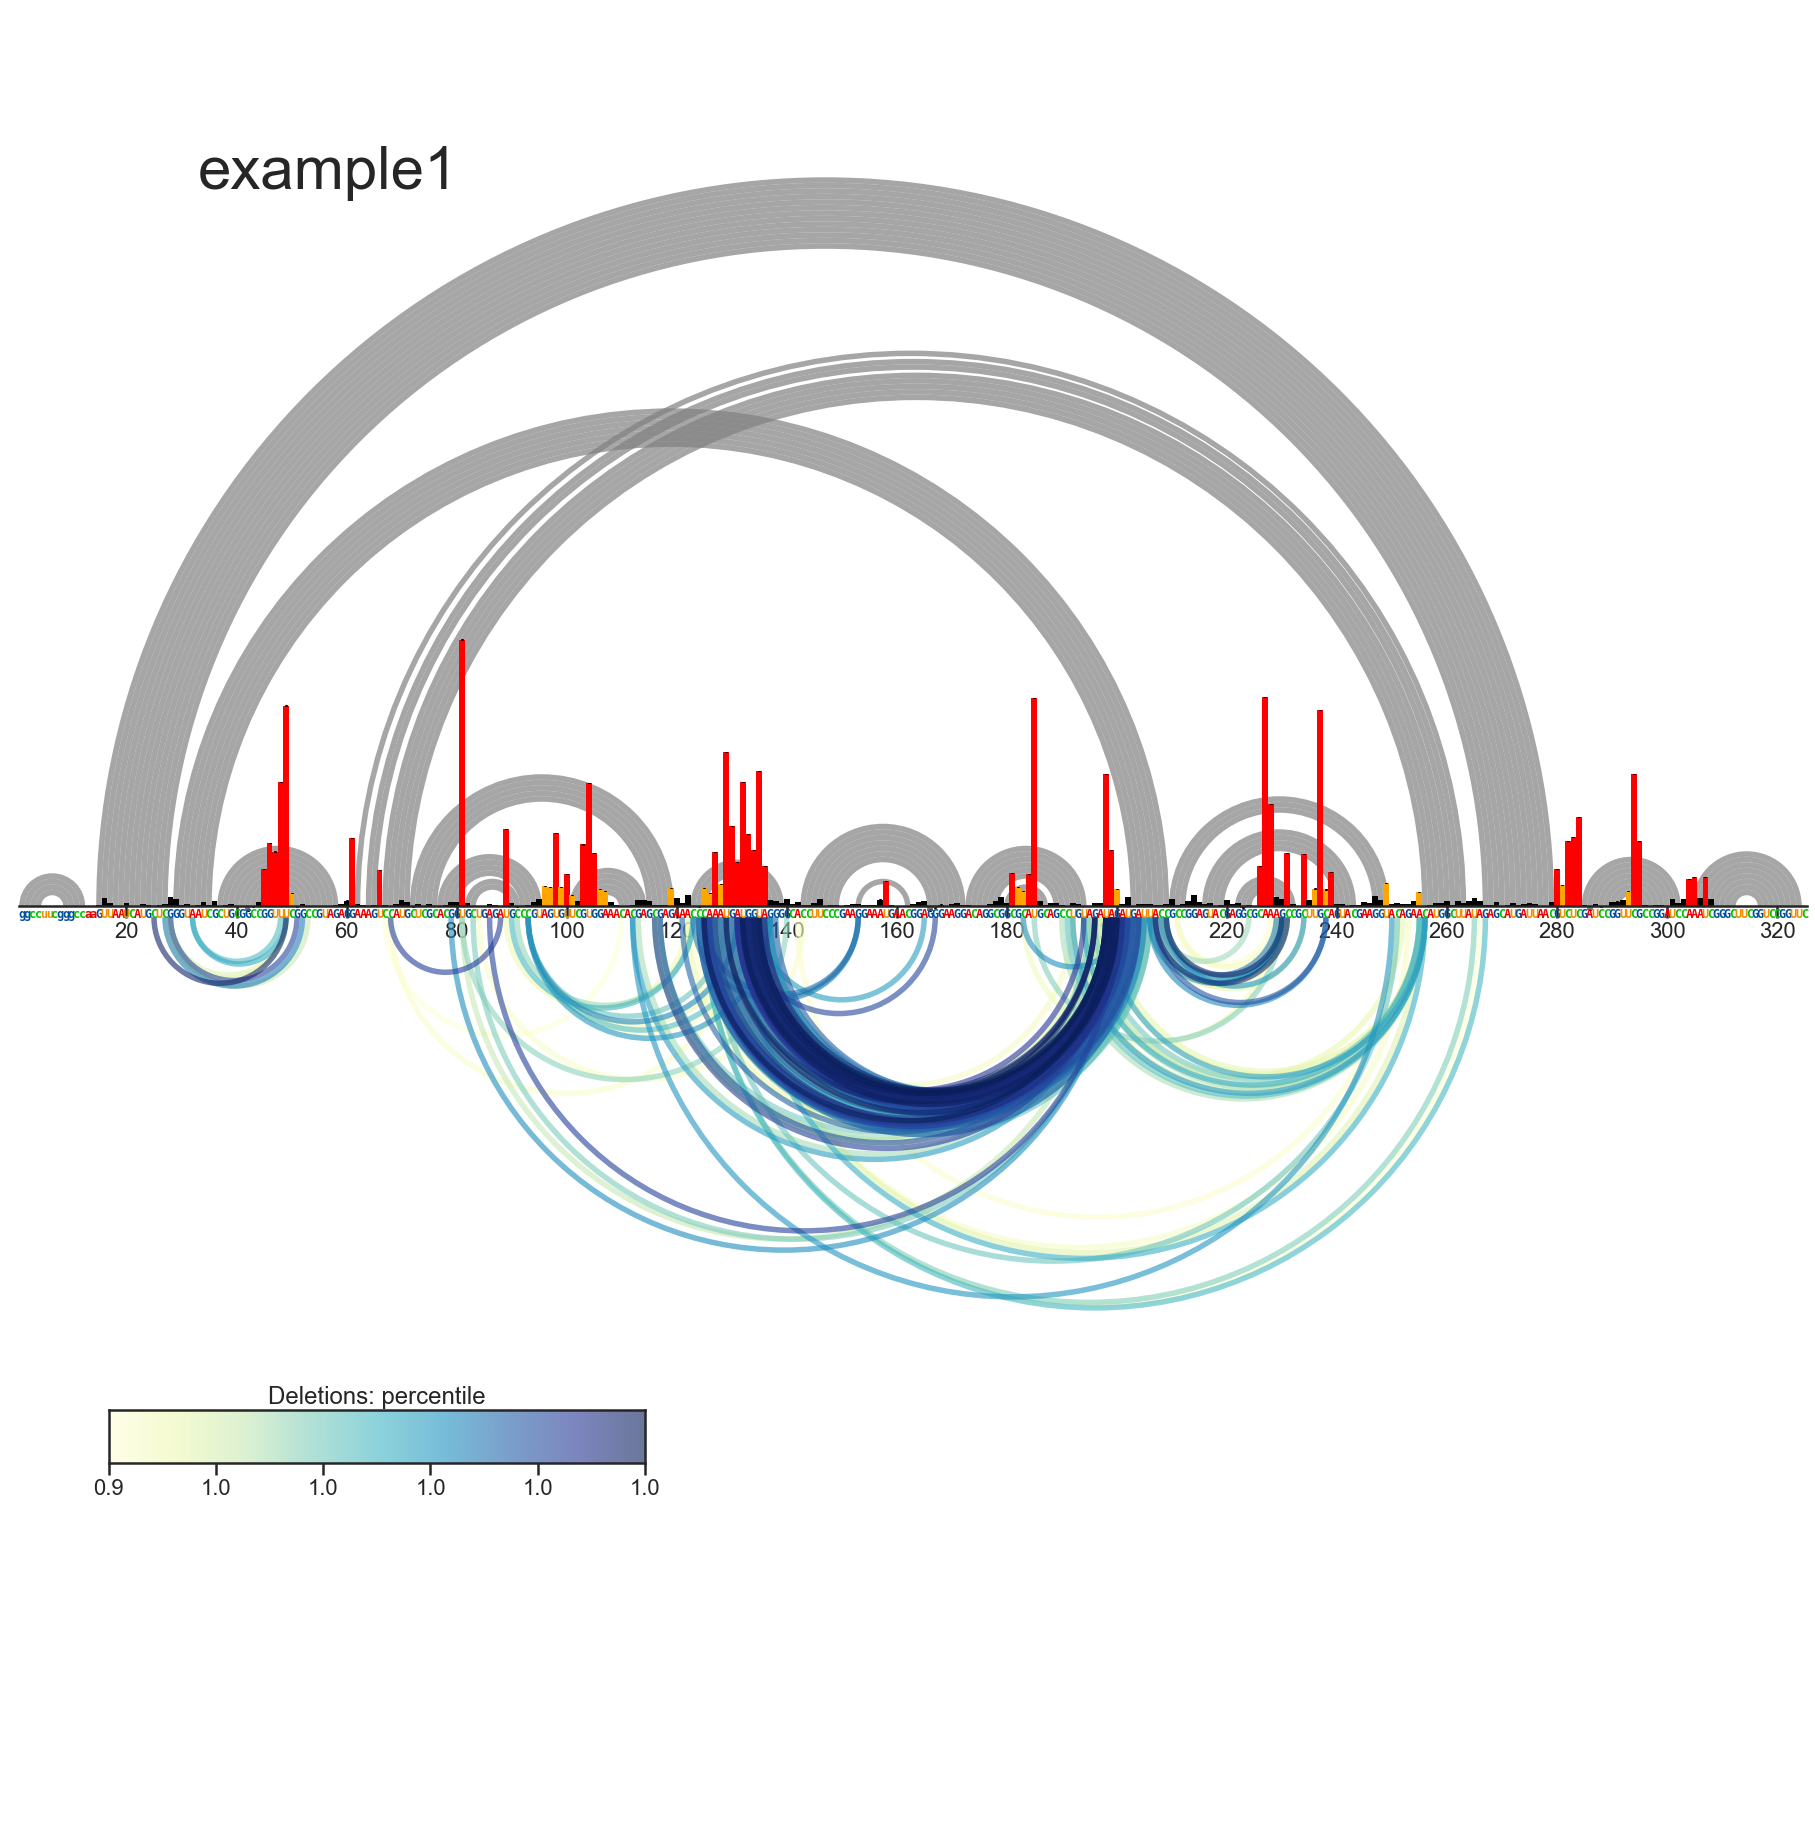

In [5]:
example1.make_ap(ij="deletions", Percentile_ge=0.95, min_max=[0.95, 1], cdAbove=14)

Interesting...Let's see if these are really reflective of tertiary structure.
This time, we'll use the "Distance" metric to color the arcs. We'll have to
change the min_max again, since it is now being applied to the Distance metric.
We'll also further limit the percentile (98th).

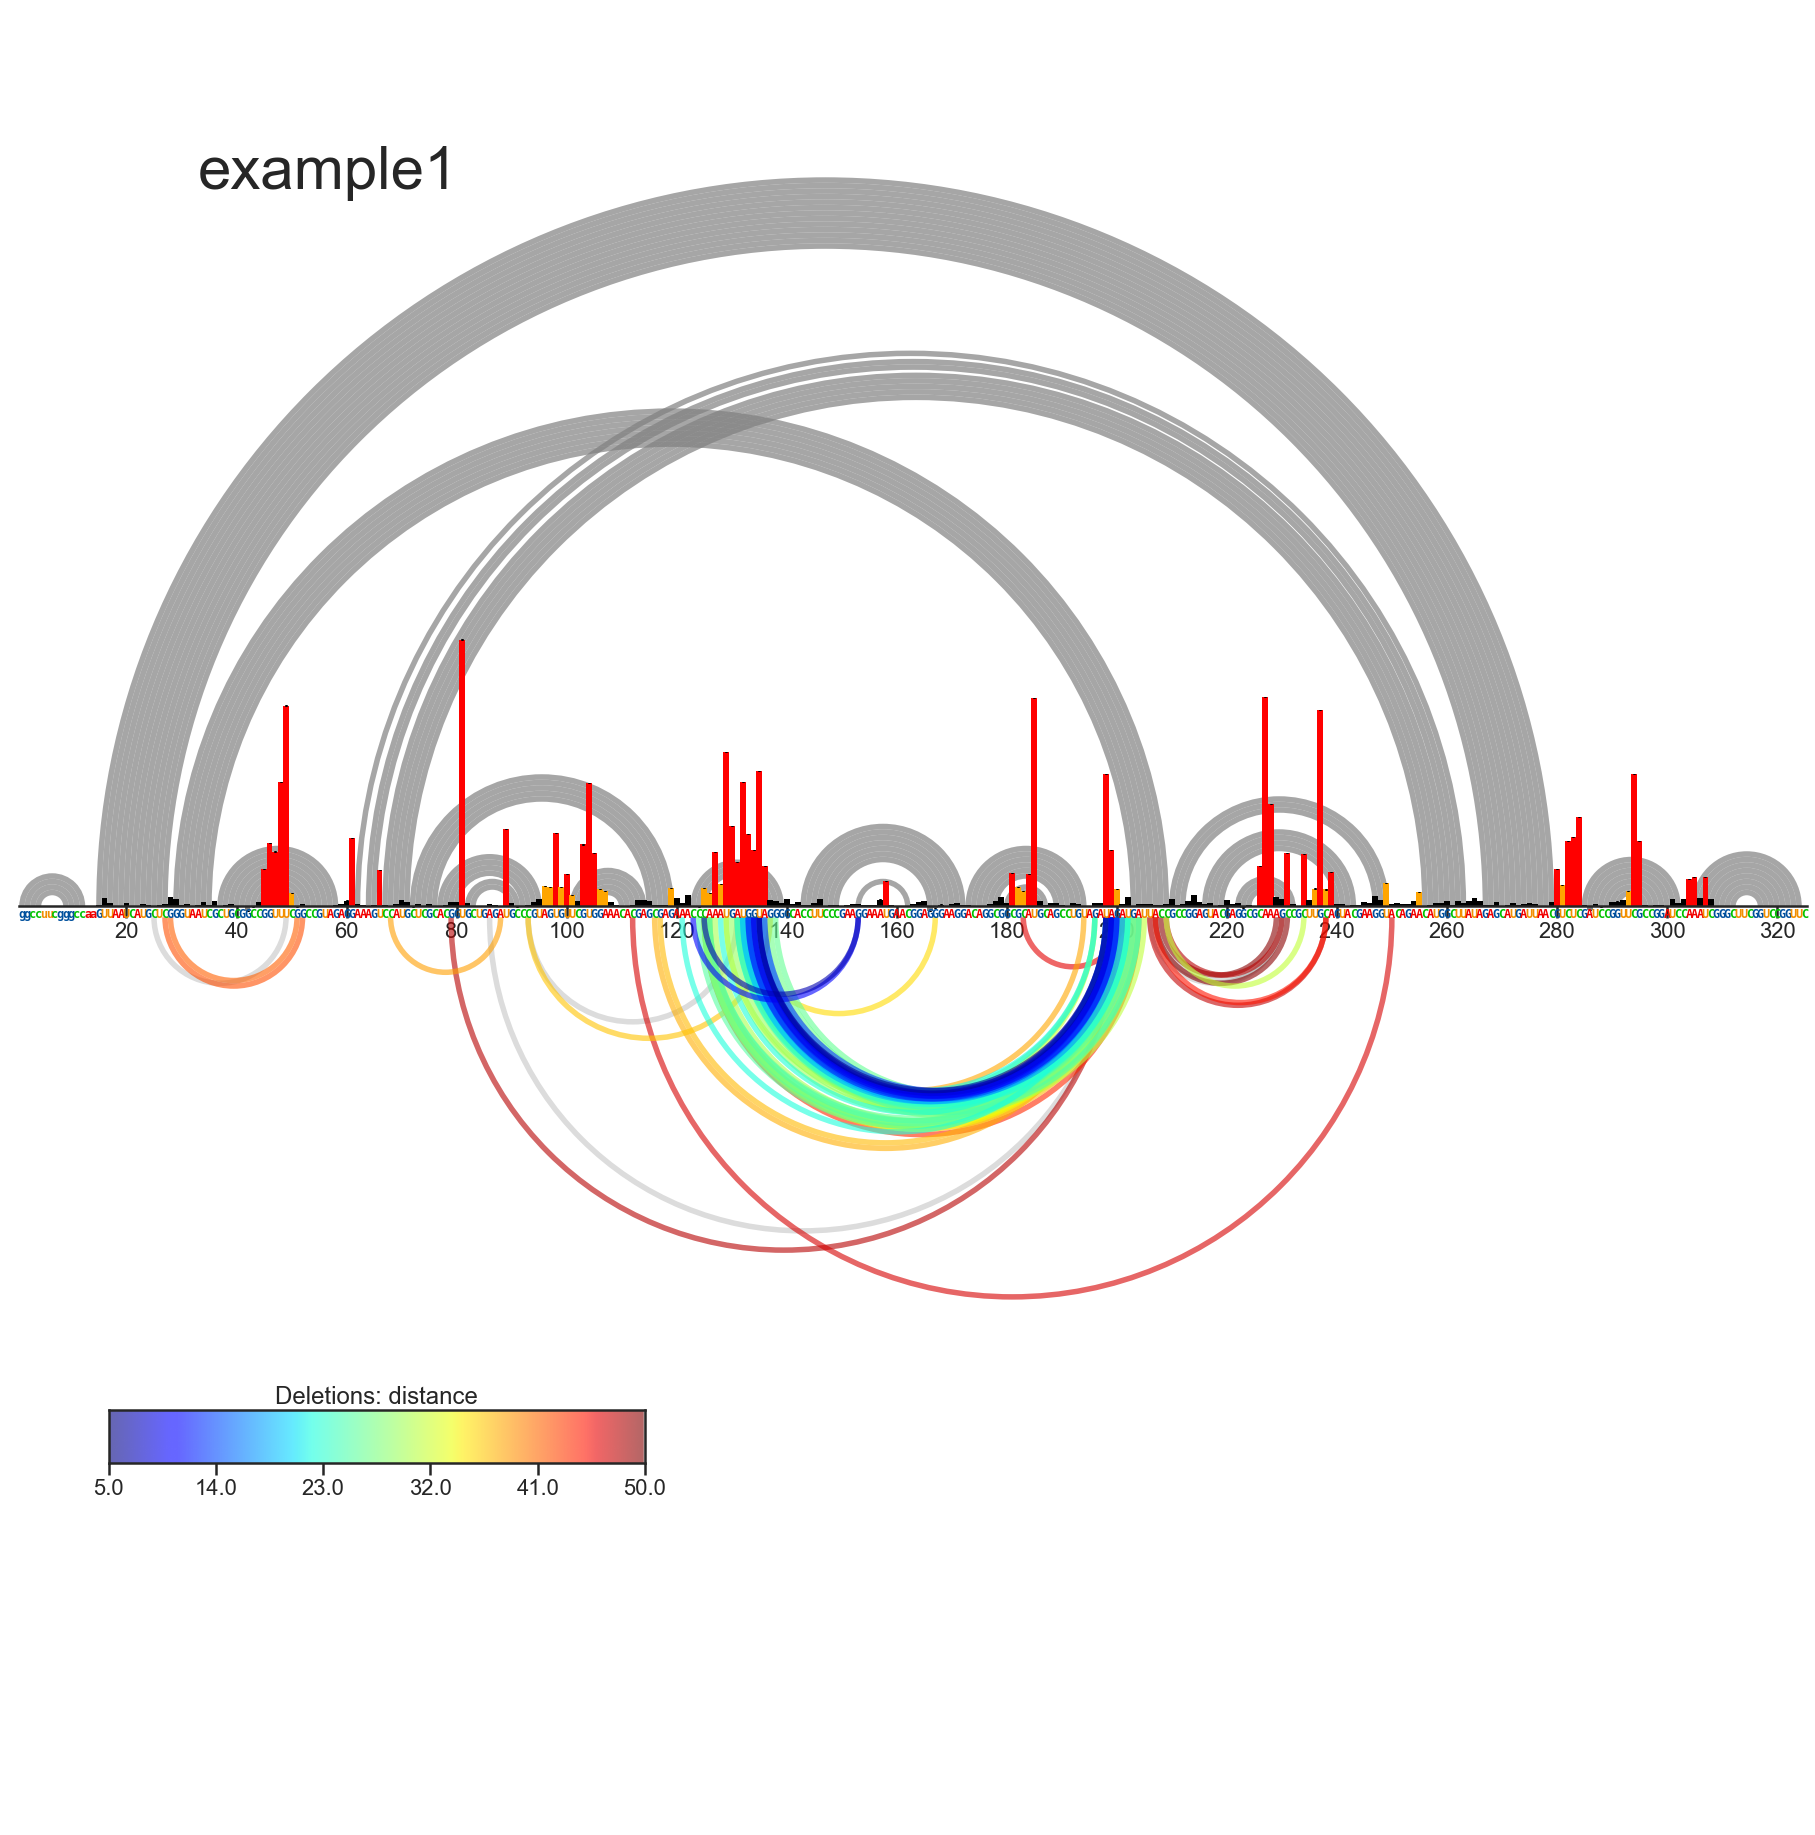

In [6]:
example1.make_ap(ij="deletions", Percentile_ge=0.98,
                 min_max=[5, 50], cdAbove=14, metric="Distance")

Many of the one-off deletions are quite far away, but the densest cluster here
is *definitely* close in space. Pretty neat!

All of the options
------------------

### Filtering on sequence

* compliment_only=True: only include when window i is the reverse compliment of window j
* nts="AUG": only include windows consisting only of A, U, or G

### Filtering on structure

* cdAbove=#: minumum i-to-j contact distance in the structure graph must be greater than #
* cdBelow=#: minimum i-to-j contact distance must be less than #
* ss_only=True: include only if i and j are both unpaired (only works for 1-nt windows)
* ds_only=True: include only if i and j are both paired (only works for 1-nt windows)
* paired_only=True: include only if i and j are paired to each other

### Filtering by profile

* profAbove=#: include only if Normalized SHAPE reactivity is greater than #
* profBelow=#: include only if Normalized SHAPE reactivity is less than #

### Filtering by position

* exclude_nts=[#, #, #]: exclude if any of list of numbers is in either window
* isolate_nts=[#, #, #]: include only if each window is entirely within list of numbers.

### Filtering on data values

* ColumnName_operator=#:

  * Data from "ColumnName" of data frame must be greater than or equal to #
  * ColumnName is a valid column of the data frame.

    * to see valid column names for "rings" data, type `sample.valid_columns("rings")`, where `sample` is the name of your MaP.Sample object.

  * operator is one of:

    * ge (greater that or equal to)
    * le (less than or equal to)
    * gt (greater than)
    * lt (less than)
    * eq (equal to)
    * ne (not equal to)

### Other filters

* all_pairs=True: include all complimentary PAIRs along with primary and secondary PAIRs
* positive_only: include only if "+/-" column of RING-MaP file is equal to 1
* negative_only: include only if "+/-" column of RING-MaP file is equal to -1
* resolve_conflicts=True: Finds the maximum weighted set of non-conflicting correlation (parallel correlations do not conflict)

### Other IJ plotting options

* metric="Column_name"

  * The colors of each ij pair will be taken from this value.
  * "Column_name" is a valid column name of the data
  * "Column_name" can also be "Distance", which will be set to the 3D distance of the "O2`" atoms of i and j in the given PDB file.
  * You can specifiy the atom that distances are calculated from by appending "_atom_name" , e.g. "Distance_DMS" or "Distance_O3`"
  * For DMS data, use "Distance_DMS" which will use "N1" for A and G, and "N3" for U and C.

* cmap="mpl_cmap_name"

  * The colormap used to display ij data will be retreived from matplotlib.
  * Can also be a list of matplotlib colors, and a continuous colormap will be created.
  * Can also be a single matplotlib color. All values would be displayed in that color.
  * Special colormaps are used for PAIR-MaP "Class" data and "Distance" data.

* min_max=[#, #]

  * The colormap will start at the first # and end at the second #.
  * Data outside this range will be plotting with the most extreme color values.